In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from pandas_profiling import ProfileReport

In [8]:
# Configurações
work_directory = "../../combustiveis/"
dataset_name = "dataset_etanol_sp.csv"

In [15]:
df = pd.read_csv(work_directory + dataset_name, sep=",", decimal=".", encoding="cp860", index_col=False)

print("Dataset carregado. Quantidade de registros:" + str(len(df.index)))

Dataset carregado. Quantidade de registros:2032002


In [16]:
# Remover valores não-numéricos
df = df.dropna()

In [10]:
df.columns

Index(['Semestre', 'ΓêÒΓòùΓõÉRegiao - Sigla', 'Estado - Sigla', 'Municipio',
       'Revenda', 'CNPJ da Revenda', 'Nome da Rua', 'Numero Rua',
       'Complemento', 'Bairro', 'Cep', 'Produto', 'Data da Coleta',
       'Valor de Venda', 'Valor de Compra', 'Unidade de Medida', 'Bandeira'],
      dtype='object')

In [20]:
df

,Semestre,ΓêÒΓòùΓõÉRegiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
6,2020-01,SE,SP,AMPARO,AUTO POSTO DBV LTDA,09.371.227/0001-18,AVENIDA ANESIO GUIDI,344,ESQ.R.RACHID KASSOUF,DISTRITO TRES PONTES,13909-000,ETANOL,02/01/2020,3.099,2.6887,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
14,2020-01,SE,SP,ATIBAIA,POSTO 22 - ATIBAIA LTDA,05.343.449/0001-76,RODOVIA FERNAO DIAS,S/N,"KM. 47,5",PORTAO,12949-030,ETANOL,03/01/2020,2.997,2.7501,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
15,2020-01,SE,SP,ATIBAIA,POSTO DE COMBUSTIVEL ATIBAIA SP LTDA,69.345.254/0001-48,RODOVIA FERNAO DIAS,S/N,KM 50,PORTΓõ£├óO,12940-000,ETANOL,03/01/2020,3.097,2.7555,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
30,2020-01,SE,SP,CACAPAVA,CARREFOUR COMERCIO E INDUSTRIA LTDA,45.543.915/0355-62,AVENIDA BRASIL,401,SETOR I,CENTRO,12287-020,ETANOL,03/01/2020,3.079,2.6946,R$ / litro,RAIZEN
62,2020-01,SE,SP,GUARULHOS,FAROL COMERCIAL LTDA,49.091.291/0001-60,RODOVIA PRESIDENTE DUTRA,S/N,KM 208+620 MTS,BONSUCESSO,07178-580,ETANOL,03/01/2020,2.949,2.6726,R$ / litro,RAIZEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2031909,2016-01,SE,SP,OSASCO,AUTO POSTO LOMBARDIA DI ITALIA EIRELI,14.381.352/0001-49,AVENIDA DOS AUTONOMISTAS,4961,TERREO;,KM 18,06194-050,ETANOL,27/06/2016,1.979,1.7599,R$ / litro,BRANCA
2031918,2016-01,SE,SP,GUARULHOS,AUTO POSTO D6 LTDA,14.620.521/0001-56,AVENIDA OTAVIO BRAGA DE MESQUITA,1309,1309 A,VILA FLORIDA,07191-000,ETANOL,27/06/2016,2.199,1.9351,R$ / litro,IPIRANGA
2031950,2016-01,SE,SP,SAO PAULO,COMERCIO VAREJISTA DE COMBUSTIVEIS JARDIM RIVI...,17.641.760/0001-80,AVENIDA BERNARDO GOLDFARB,S/N,LOTE 3 QUADRA 3,JARDIM ANGELA (ZONA SUL),04920-125,ETANOL,29/06/2016,2.299,2.0434,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
2031981,2016-01,SE,SP,POA,AUTO POSTO GUERRREIRO DE POA LTDA,18.922.718/0001-09,ESTRADA VELHA SAO PAULO/RIO,600,KM 34,VILA ACORIANA,08550-000,ETANOL,27/06/2016,2.199,1.9000,R$ / litro,BRANCA


In [19]:
# Valor médio do preço de venda
np.mean(df["Valor de Venda"])

1.6629390402248847

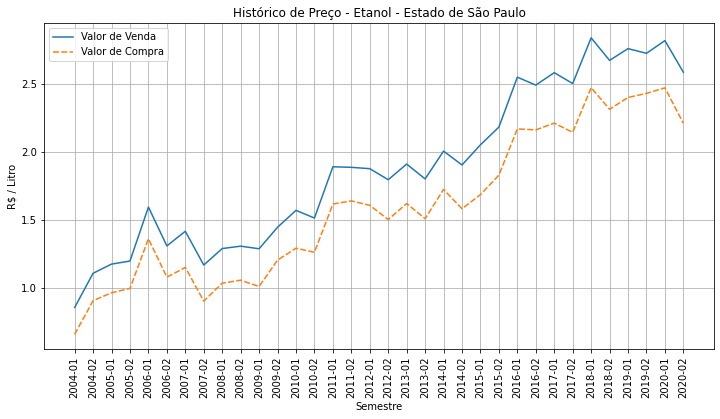

In [26]:
# Valores médios de venda e compra agrupados por semestre
df_grouped = df.groupby("Semestre").mean()

plt.figure(figsize=(12,6))
plt.title("Histórico de Preço - Etanol - Estado de São Paulo")
plt.ylabel("R$ / Litro")
plt.grid()
graph = sns.lineplot(data=df_grouped)
graph.tick_params(axis='x', rotation=90)